# linear regression

# .

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
housing=pd.read_excel('Linear Regression.xlsx')
housing.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
housing.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [4]:
housing.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [5]:
col_house = housing.columns
col_house

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

### . 

In [6]:
#### sqft(idv) and price(dv)

price=housing.price              #### dv
sqft=housing.sqft_living         #### idv
b=sm.add_constant(sqft)          #### contant or the intercept in y axis
model_sqft=sm.OLS(price,sqft)    #### OLS --> ordinary least square ####3## y=dv and x=idv
price_sqft=model_sqft.fit()

In [7]:
price_sqft.predict([10])

array([2630.89189287])

In [8]:
price_sqft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.126e+05
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:55:14   Log-Likelihood:                     -3.0032e+05
No. Observations:               21613   AIC:                                  6.006e+05
Df Residuals:                   21612   BIC:                                  6.006e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.0892      0.784    335.597      0.000     261.553     264.626
==============================================================================
Omnibus:                    16043.334   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           692411.844
Skew:                           3.130   Prob(JB):                         0.00
Kurtosis:                      30.013   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([7.5690e+03, 1.0681e+04, 2.8140e+03, 4.4100e+02, 7.7000e+01,
        2.4000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  290.,  1615.,  2940.,  4265.,  5590.,  6915.,  8240.,  9565.,
        10890., 12215., 13540.]),
 <BarContainer object of 10 artists>)

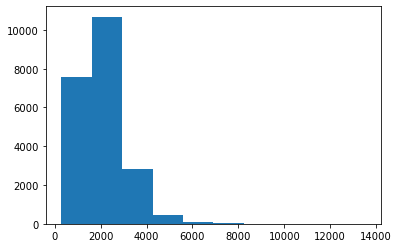

In [9]:
##### checking hetroskedasticity (histogram to check +ve skew or -ve skew)

plt.hist(sqft)

In [10]:
## checking autocorralation


from scipy.stats import pearsonr
stats,p = pearsonr(price,sqft)
print(stats,p)

0.7020350524336836 0.0


In [11]:

price=housing.price              #### dv
sqft1=housing.sqft_living         #### idv
b=sm.add_constant(sqft1)          #### contant or the intercept in y axis
model_sqft1=sm.OLS(price,sqft1)    #### OLS --> ordinary least square ####3## y=dv and x=idv
price_sqft1=model_sqft1.fit()
sqft_cost = model_sqft1.predict(sqft1.values.reshape(1,21613))
sqft_cost=pd.DataFrame(data=sqft_cost)
sqft_cost.shape

(21613, 21613)

In [12]:
### bedroom(idv) and price(dv)

bedroom=housing.bedrooms          #### idv
b1 = sm.add_constant(bedroom)
model_bedroom=sm.OLS(price,bedroom)
price_bedroom = model_bedroom.fit()

In [13]:
price_bedroom.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.711
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                          5.323e+04
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:55:22   Log-Likelihood:                     -3.0663e+05
No. Observations:               21613   AIC:                                  6.133e+05
Df Residuals:                   21612   BIC:                                  6.133e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    1.575e+05    682.663    230.713      0.000    1.56e+05    1.59e+05
==============================================================================
Omnibus:                    17896.494   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1088783.142
Skew:                           3.594   Prob(JB):                         0.00
Kurtosis:                      37.020   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([1.2796e+04, 8.7550e+03, 5.7000e+01, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <BarContainer object of 10 artists>)

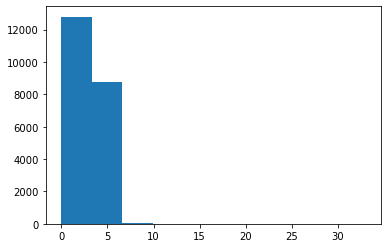

In [14]:
##### checking hetroskedasticity (histogram to check +ve skew or -ve skew)

plt.hist(bedroom)

In [15]:
## checking autocorralation


from scipy.stats import pearsonr
stats1,p1 = pearsonr(price,bedroom)
print(stats1,p1)

0.3083495978848225 0.0


In [16]:
# bathroom(idv) and price(dv)

bathroom=housing.bathrooms          #### idv
b2 = sm.add_constant(bathroom)
model_bathroom=sm.OLS(price,bathroom)
price_bathroom = model_bathroom.fit()

In [17]:
price_bathroom.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.771
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                          7.280e+04
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:55:23   Log-Likelihood:                     -3.0412e+05
No. Observations:               21613   AIC:                                  6.082e+05
Df Residuals:                   21612   BIC:                                  6.082e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bathrooms   2.548e+05    944.330    269.818      0.000    2.53e+05    2.57e+05
==============================================================================
Omnibus:                    17130.465   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           861569.543
Skew:                           3.416   Prob(JB):                         0.00
Kurtosis:                      33.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([8.600e+01, 5.307e+03, 7.025e+03, 7.318e+03, 1.475e+03, 3.380e+02,
        4.400e+01, 1.200e+01, 4.000e+00, 4.000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

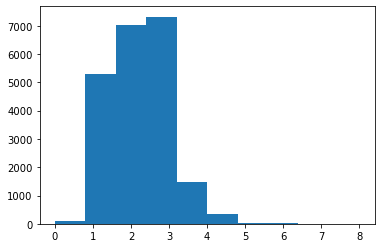

In [18]:
##### checking hetroskedasticity (histogram to check +ve skew or -ve skew)

plt.hist(bathroom)

In [19]:
## checking autocorralation


from scipy.stats import pearsonr
stats2,p2 = pearsonr(price,bathroom)
print(stats2,p2)

0.5251375045796025 0.0


In [20]:
floor=housing.floors          #### idv
b3 = sm.add_constant(floor)
model_floor=sm.OLS(price,floor)
price_floor = model_floor.fit()

In [21]:
price_floor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.684
Method:                 Least Squares   F-statistic:                          4.672e+04
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:55:24   Log-Likelihood:                     -3.0761e+05
No. Observations:               21613   AIC:                                  6.152e+05
Df Residuals:                   21612   BIC:                                  6.152e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
floors      3.399e+05   1572.369    216.139      0.000    3.37e+05    3.43e+05
==============================================================================
Omnibus:                    16926.427   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           841619.223
Skew:                           3.354   Prob(JB):                         0.00
Kurtosis:                      32.826   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([1.068e+04, 0.000e+00, 1.910e+03, 0.000e+00, 8.241e+03, 0.000e+00,
        1.610e+02, 0.000e+00, 6.130e+02, 8.000e+00]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ]),
 <BarContainer object of 10 artists>)

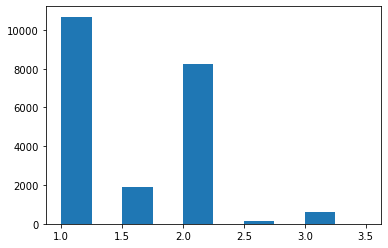

In [22]:
##### checking hetroskedasticity (histogram to check +ve skew or -ve skew)

plt.hist(floor)

In [23]:
## checking autocorralation

from scipy.stats import pearsonr
stats3,p3 = pearsonr(price,floor)
print(stats3,p3)

0.256793884063341 1.6e-322


# .

In [24]:
### sqft,bedroom,bathroom,floor (idv) and price (dv)

house_cost=housing.iloc[:,1:]          #### idv
b0 = sm.add_constant(house_cost)
model_overAllcost=sm.OLS(price,house_cost)
price_house = model_overAllcost.fit()

In [25]:
price_house.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                          2.912e+04
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:55:25   Log-Likelihood:                     -3.0001e+05
No. Observations:               21613   AIC:                                  6.000e+05
Df Residuals:                   21609   BIC:                                  6.001e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   305.3462      3.065     99.613      0.000     299.338     311.354
bedrooms    -4.318e+04   1802.601    -23.956      0.000   -4.67e+04   -3.96e+04
bathrooms    1.064e+04   3811.694      2.791      0.005    3165.360    1.81e+04
floors       1.618e+04   3406.591      4.749      0.000    9499.847    2.29e+04
==============================================================================
Omnibus:                    13983.158   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457060.878
Skew:                           2.622   Prob(JB):                         0.00
Kurtosis:                      24.910   Cond. No.                     5.70e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## checking multicollinearity

housing.corr()

In [ ]:
plt.figure(figsize=(30,10))
sns.jointplot(x='sqft_living',y='price',data=housing)

In [ ]:


predtic_cost = model_overAllcost.predict(house_cost)
predict_cost.head()

In [ ]:
house_cost.head()

In [ ]:
house_cost.shape

In [ ]:
houses_cost = model_overAllcost.predict(house_cost.values.reshape(4,21613))
houses_cost=pd.DataFrame(data=houses_cost)
houses_cost.shape

#### .

#### .

### train test split

In [95]:
house= housing.iloc[:,1:]

from sklearn.model_selection import train_test_split

house_train,house_test,price_train,price_test = train_test_split(house,price,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(house_train,price_train)

predictt=model.predict(house_test)


In [96]:
predictt

array([ 416231.107617  , 1325667.80774905,  410023.85622345, ...,
        341164.21211411,  202662.35938641,  424927.6966897 ])

In [97]:
predictt.shape

(4323,)

In [98]:
house_test.shape

(4323, 4)

In [99]:
housing.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [100]:
resultt=house_test
resultt['actual']=housing.price
resultt['predictt']=predictt.round()
resultt.head()

,sqft_living,bedrooms,bathrooms,floors,actual,predictt
17384,1430,2,1.50,3.0,297000,416231.0
722,4670,4,3.25,2.0,1578000,1325668.0
2680,1440,2,0.75,1.0,562100,410024.0
18754,1130,2,1.00,1.0,631500,314411.0
14554,3180,4,2.50,2.0,780000,854576.0


In [101]:
model.intercept_

65340.251323104545

In [ ]:
resultt

In [102]:
model.score(house_train,price_train)

0.5090292992594028

In [103]:
model.coef_

array([   313.19378504, -56600.74916997,   5910.55508513,   2453.13646507])

In [94]:
col1=resultt.columns
col1=col1[:5]
col1

Index(['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'actual'], dtype='object')

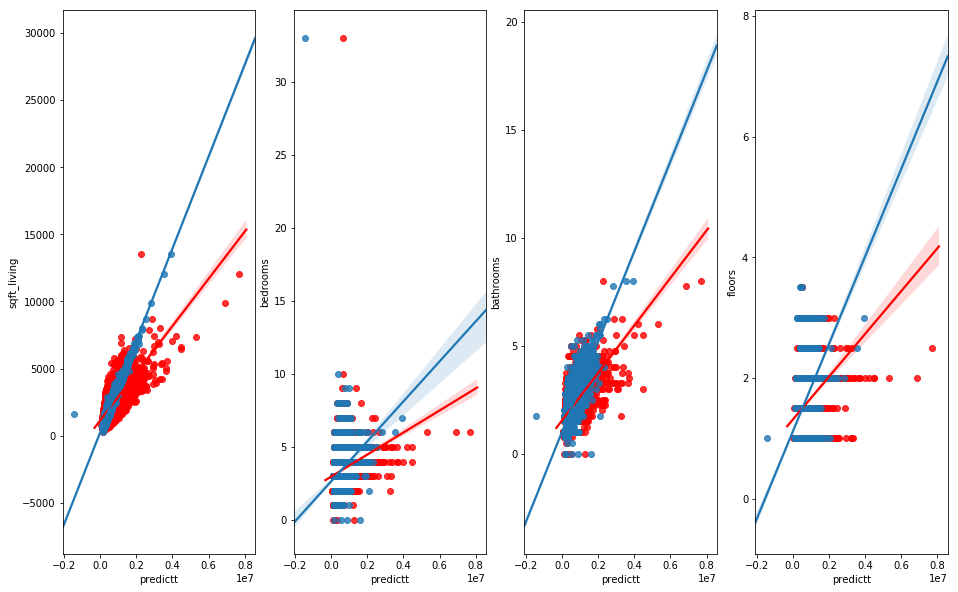

In [56]:


plt.figure(figsize=(20,10))
for i in range(len(col1)-1):
    plt.subplot(1,5,i+1)
    sns.regplot(x=resultt['actual'],y=col1[i],data=resultt,label=col1[i],color='r')
    sns.regplot(x=resultt['predictt'],y=col1[i],data=resultt,label=col1[i])

plt.show()

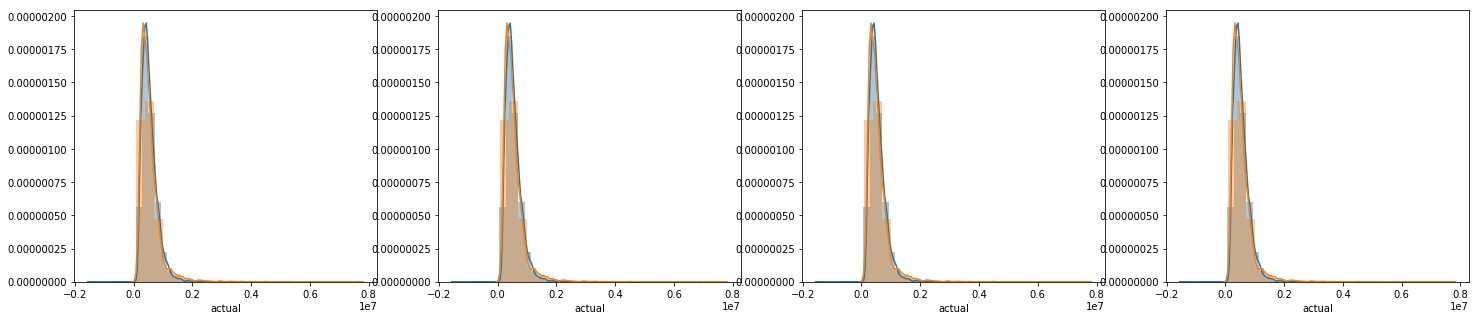

In [50]:


plt.figure(figsize=(25,5))
for i in range(len(col1)-1):
    plt.subplot(1,4,i+1)
    sns.distplot(resultt['predictt'],bins=25,label='predict')
    sns.distplot(resultt['actual'],bins=25,label='actual')

plt.show()

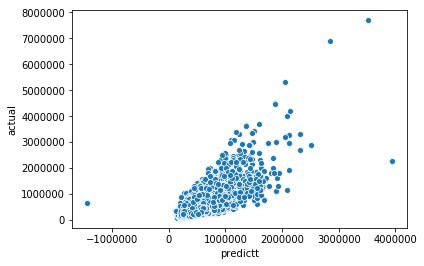

In [53]:
sns.scatterplot(x='predictt',y='actual',data=resultt)

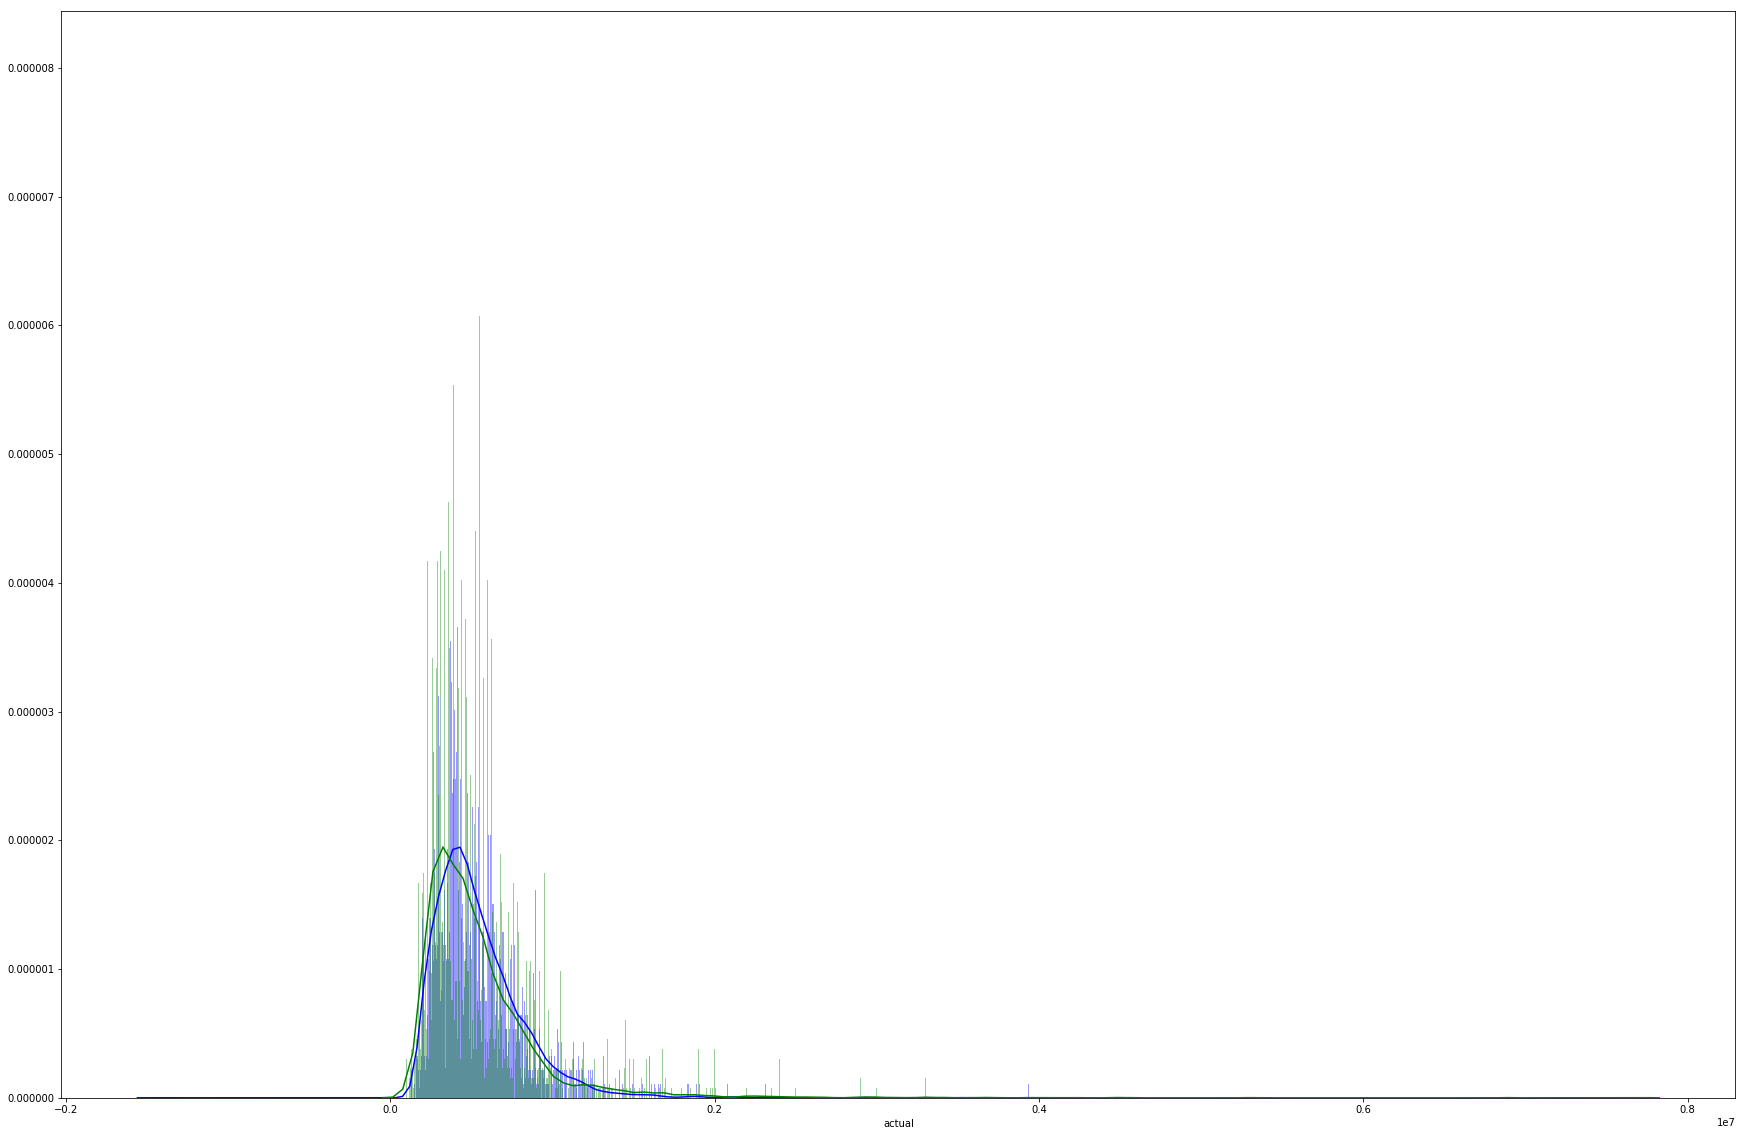

In [163]:
plt.figure(figsize=(30,20))
sns.distplot(resultt['predictt'],bins=5000,color='b')
sns.distplot(resultt['actual'],bins=5000,color='g')